In [5]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
# Disable pandas limiting line length when printing
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.width', 1000)
# Read data
data = pd.read_csv(f"../build/reports/benchmark.csv", sep=',')
# data = data[(data['lines-left'] > 0) & (data['lines-right'] > 0)]  # remove runs where there were no lines in a log. it should have been skipped in the benchmark, but I forgot.
data['moved'] = data["moved-unchanged"] + data['moved-updated']

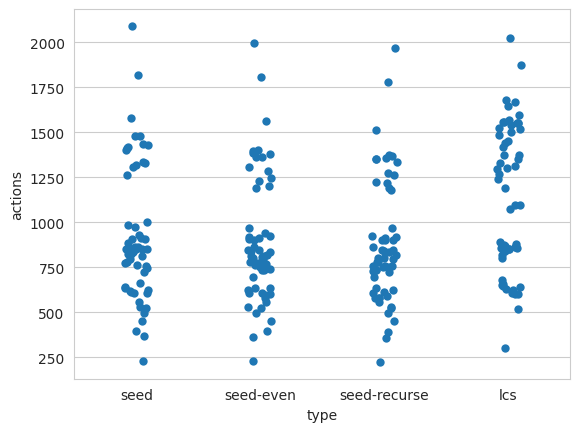

In [17]:
# Actions
_=sns.stripplot(data=data[data["actions"] < 2500], y='actions', x='type', hue="type", palette="bright", s=6)

type                                                                                            directory   lcs  seed  seed-even  seed-recurse  seed-diff  seed-even-diff  seed-recurse-diff
0         AliveToolkit/alive2/eb5b9484f715f2977878d18416466ea549e9e6a9/Build/macos-latest clang++ Release   753   675        675           675   0.103586        0.103586           0.103586
1                    Altinn/altinn-studio/7bc4cae8a87ee8cf9de7bef4a14b13d762a8b832/AppTemplate Scan/build   928   880        880           878   0.051724        0.051724           0.053879
2                        Altinn/altinn-studio/d54f6269fe1a87dfd3397418ca26444b31cf6e9a/Storage Scan/build  7753  7393       7393          7391   0.046434        0.046434           0.046692
3                         Altinn/altinn-studio/db9fa26ee533f518db877f18d0bd7b815eef9e11/Events Scan/build  7757  7407       7407          7405   0.045121        0.045121           0.045378
4     AnthonyMichaelTDM/basic-computer-games/47dd843f40

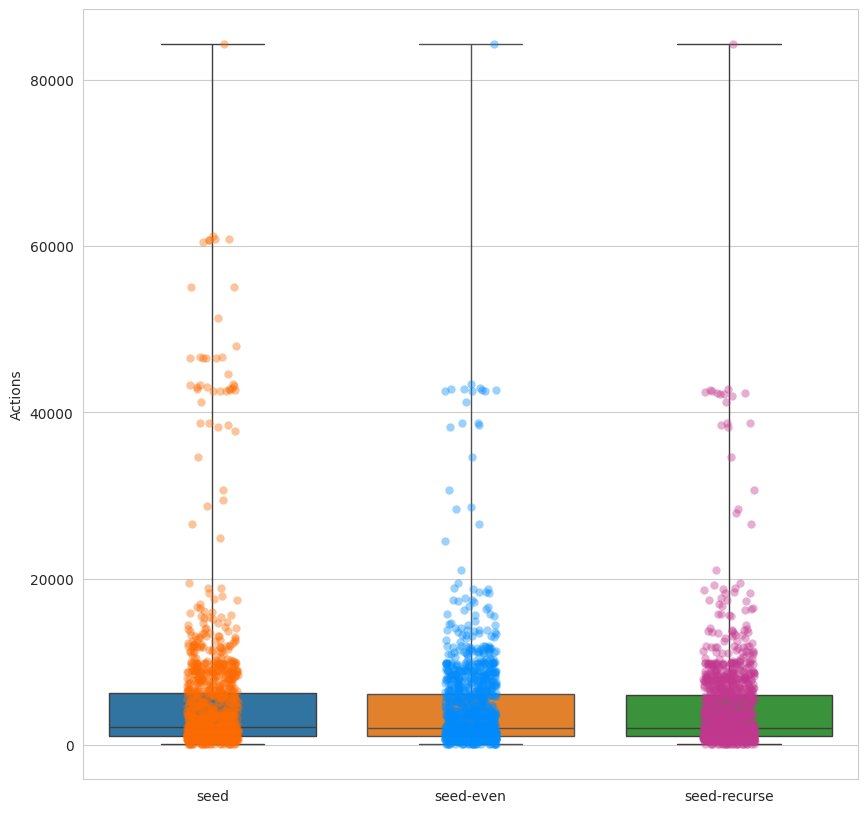

In [27]:
# Actions
pivoted = data.pivot(index='directory', columns="type", values="actions").reset_index()
pivoted['seed-diff'] = (pivoted['lcs'] - pivoted['seed']) / pivoted['lcs']
pivoted['seed-even-diff'] = (pivoted['lcs'] - pivoted['seed-even']) / pivoted['lcs']
# pivoted['seed-recurse-diff'] = (pivoted['lcs'] - pivoted['seed-recurse']) / pivoted['lcs']
# pivoted['seed-diff'] = pivoted['lcs'] - pivoted['seed']
# pivoted['seed-even-diff'] = pivoted['lcs'] - pivoted['seed-even']
# pivoted['seed-recurse-diff'] = pivoted['lcs'] - pivoted['seed-recurse']
print(pivoted.head())

plt.figure(figsize=(10,10))
plt.ylabel('Actions')
plt.xticks([0, 1, 2], ['seed', 'seed-even', 'seed-recurse'])
sns.stripplot(data=pivoted, y='seed', x=0, color="#fc6b0366", s=6)
sns.boxplot(data=pivoted, y='seed', x=0, whis=(0, 100))
sns.stripplot(data=pivoted, y='seed-even', x=1, color="#038cfc66", s=6)
sns.boxplot(data=pivoted, y='seed-even', x=1, whis=(0, 100))
# sns.stripplot(data=pivoted, y='seed-recurse', x=2, color="#c2388f66", s=6)
# _=sns.boxplot(data=pivoted, y='seed-recurse', x=2, whis=(0, 100))

# positive = seed is better (because lcs-seed)
# negative = lcs is better (because lcs-seed)

In [ ]:
# Durations
pivoted = data.pivot(index='directory', columns="type", values="duration").reset_index()
pivoted['seed-diff'] = (pivoted['lcs'] - pivoted['seed']) / pivoted['lcs']
pivoted['seed-even-diff'] = (pivoted['lcs'] - pivoted['seed-even']) / pivoted['lcs']

plt.figure(figsize=(10,10))
plt.ylabel('Duration')
plt.xticks([0, 1], ['seed', 'seed-even'])

# Hiding outliers
sns.boxplot(data=pivoted, y='seed-diff', x=1, showfliers=False)
_=sns.boxplot(data=pivoted, y='seed-even-diff', x=2, showfliers=False)
# Disabling outliers
# sns.boxplot(data=pivoted, y='seed-diff', x=1, whis=(0, 100))
# _=sns.boxplot(data=pivoted, y='seed-even-diff', x=2, whis=(0, 100))

# positive = seed is better (because lcs-seed)
# negative = lcs is better (because lcs-seed)

In [30]:
# Display row where there are no difference between lcs and seed (in terms of actions)
pivoted = data.pivot_table(index='directory', columns="type", values="actions").reset_index()
pivoted['seed-diff'] = pivoted['lcs'] - pivoted['seed']
pivoted['seed-even-diff'] = pivoted['lcs'] - pivoted['seed-even']
# pivoted['seed-recurse-diff'] = pivoted['lcs'] - pivoted['seed-recurse']

with_zero=pivoted[pivoted['seed-diff'] == 0]

print(pivoted)

type                                                                                            directory     lcs    seed  seed-even  seed-recurse  seed-diff  seed-even-diff  seed-recurse-diff
0         AliveToolkit/alive2/eb5b9484f715f2977878d18416466ea549e9e6a9/Build/macos-latest clang++ Release   753.0   675.0      675.0         675.0       78.0            78.0               78.0
1                    Altinn/altinn-studio/7bc4cae8a87ee8cf9de7bef4a14b13d762a8b832/AppTemplate Scan/build   928.0   880.0      880.0         878.0       48.0            48.0               50.0
2                        Altinn/altinn-studio/d54f6269fe1a87dfd3397418ca26444b31cf6e9a/Storage Scan/build  7753.0  7393.0     7393.0        7391.0      360.0           360.0              362.0
3                         Altinn/altinn-studio/db9fa26ee533f518db877f18d0bd7b815eef9e11/Events Scan/build  7757.0  7407.0     7407.0        7405.0      350.0           350.0              352.0
4     AnthonyMichaelTDM/basic-compu